<font size="1"> *This notebook is best viewed in jupyter lab/notebook. You may also choose to use Google Colab but some parts of the images/colouring will not be rendered properly.</font> 

<div class="alert alert-block alert-warning">

# <p style="text-align: center;">Lab 1 (Weeks 1,2): Python Basics - Part 2. Application Notebook</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" width="200" height="200" />

Welcome to your very first lab of ECE4179. Labs in this unit will run as a help desk and they are not mandatory to attend.   

The two notebooks provided contain all the code and comments that you need to submit. Feel free to add in your own markdown for additional comments. After completion, You need to submit both Jupyter Notebooks (.ipynb file) to Moodle. Make sure you run the Notebooks before submitting and all outputs are visible.
        
In this Lab, you will find four tasks distributed across two notebooks: Basics and Applications. The first two tasks test your basic python knowledge and the applcations of numpy and matplotlib libraries. The last two tasks, you will apply the knowledge you gained so far to solve practical problems.
- <b>Task 1:</b> Python Basics
- <b>Task 2:</b> Data Analysis and Visualization
- <b>Task 3:</b> Wanna play Darts?
- <b>Task 4:</b> Thinking inside the ball!
    
Each task will contain code to complete, and a worded question, so ensure you complete both bfeore submitting.

Good luck with the Lab! Submit it before the deadline to enjoy full marks.

<b>Enter you student details below</b>

- <b>Student Name:</b> Alexander Li
- <b>Student ID:</b> 30630711 

<div class="alert alert-block alert-danger">

## Table of Contents  

* [Task 3: Wanna play Darts?](#wanna-play-darts)
	* [Estimating $\pi$](#estimating-pi)
    
    
* [Task 4: Thinking inside the Ball!](#thinking-inside-the-ball)
    * [Calculating the volume of an N-dimensional ball](#calc-n-dim-ball)


In [1]:
## Libraries, you do not need to import any additional libraries for this lab

import numpy as np ## Numpy is the fundamental building block of understanding tensor (matrices) within Python
import matplotlib.pyplot as plt ## Matplotlib.pyplot is the graphing library that we will be using throughout the semester
import random ## Useful for sampling 

from scipy.special import gamma ## Pre-built gamma function that we will use for this lab (for the final task)
import math # Basic math library

import os ## Useful for running command line within python
from IPython.display import Image ## For markdown purposes

<div class="alert alert-block alert-info">

# Task 3 - Wanna play Darts? <a class="anchor" id="wanna-play-darts"></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/Dartboard_unlabeled.svg" width="200" height="200" />

    
    
    
Once upon a time, in a faraway land...    
    
Jim walked into a bustling pub, seeking a night of fun. Drawn to the dartboard, he joined the game, aiming his darts with excitement. Amidst his throws, Jim's mind sparked an idea—what if the dart game could estimate $\pi$? He saw that the scattered hits and misses resembled random points within a square and a unit circle. Intrigued, he decided to test the theory, tallying the dart hits inside the circle.

<div class="alert alert-block alert-info">
    
## Learning Objective 
    
This task aims to explore a fascinating way of estimating the mathematical constant $\pi$ using a dart game analogy. You will delve into random points within a square and a unit circle, visualized through a dartboard scenario. Through this task, you will gain insights into probability, Monte Carlo simulations, the relationship between the dart hits inside the circle, and the estimation of $\pi$. By the end of this task, you will have a deeper appreciation for the connection between geometry and probability and the intriguing ways mathematical constants can be approximated in real-world scenarios.

## Estimating $\pi$ <a class="anchor" id="estimating-pi"></a>

In this task, you will help Jim to estimating the value of $\pi$ by using the analogy of throwing darts. Use Numpy to complete this task. Here we assume that the dart hits are spread uniformly across the square region which encapsulates the circle darts board. The following figure shows 10 randomly sampled points

<img src="https://miro.medium.com/max/803/0*oWmkwPg771ISI_aW" width="300" height="300" />

You can read this article to get a better understanding of what is happening: https://www.cantorsparadise.com/calculating-the-value-of-pi-using-random-numbers-a-monte-carlo-simulation-d4b80dc12bdf

#### (a) Follow the below instructions to estimate $\pi.$
- Generate random uniform samples between the values of \[0,1) in 2 dimensions
- Next, compute L2 norm (ie. euclidean distance from origin) of every datapoint in the 2 dimensions
- Compute the probablity that a given point lies within the unit circle
- That probability equals a quarter area of the circle

In [6]:
## Intiialise variables 

dim = 2
nSamples = int(1e4) # feel free to change

# Apply uniform sampling via the np.random.uniform function. Save it in the variable X
# Make sure to read the numpy documentation to see how it is used

X = np.random.uniform(0, 1, (nSamples, dim))

## Normalise it in L2 norm (ie. Calculate euclidean distance)

norm_X = np.linalg.norm(X, axis=1)

## Calculate the probability of the points being a radius of 1 away from the centre

# TO DO: any calculations that you think necessary
count = 0
for n in norm_X:
    if n < 1:
        count += 1
prob = count/nSamples

area = prob ## Area of one quarter of a circle is the same as the probability that we have randomly sampled from
print(area)

0.7847


#### Now, we can derive the equation for $\pi$ based off the following formula

  
The equation below demonstrates how $\pi$ can be calculated

\begin{equation*}
\frac{(\pi r^2)}{4} = area
\newline
\pi = \frac{4 * area}{r^2}
\newline
\pi = 4 * area
\newline
\end{equation*}

Where _area_ is the quantity calculated above.

#### (b) Evaluate the formula and find $\pi.$

In [ ]:
est_pi = area * 4
print(f"Estimated Pi: {est_pi:.3f}")

Estimated Pi: 3.139


<div class="alert alert-block alert-success">

#### Discussion

#### Answer the below questions based on your implementation and results.
1. Is the estimate of $\pi$ close to the actual value? Why/why not?
2. What could be potential influences? how can you improve your estimation of $\pi$?
3. Will it work if you used a normal distribution instead of a uniform distribution?

<div class="alert alert-block alert-success">

Write your answers here.

    It was close. Because the number of sample points was sufficiently large.
    The randomness of the sampling affects the value. Improving the number of samples will improve the estimation of pi.
    It will not work if I used a normal distribution, since this algorithm requires every location in the unit square to be equally likely to be sampled.


<div class="alert alert-block alert-info">

# Task 4 - Thinking inside the Ball! <a class="anchor" id="thinking-inside-the-ball"></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Sphere_wireframe.svg/220px-Sphere_wireframe.svg.png" width="200" height="200" />

    
    
    
N-dimensional balls, also known as n-balls, extend the concept of spheres into higher dimensions. They represent perfectly round objects in spaces with any number of dimensions (in mathematical sense, objects with constant positive curvature). Just like a three-dimensional sphere is a perfectly round object, an n-ball retains this characteristic in n-dimensional space. The n-ball is defined by its center point and a radius, which determines the distance from the center to any point on its surface. While it may be challenging to visualize n-balls beyond three dimensions, their study is crucial in mathematics, physics, and computer science, enabling us to understand and analyze complex phenomena in higher-dimensional spaces. In deep learning, it helps in understanding high-dimensional data distributions and defining search spaces.

<div class="alert alert-block alert-info">
    
## Learning Objective 
    
This task introduces you to n-dimensional balls, also known as n-balls, and their significance in higher-dimensional spaces. Through this task, you will understand how n-balls extend the idea of spheres to spaces with any dimensions, retaining their perfectly round characteristics. You will explore the definition of n-balls, consisting of a center point and a radius, determining the distance from the center to any point on its surface. 

## Calculating the volume of an N-dimensional ball <a class="anchor" id="calc-n-dim-ball"></a>

In this task, we want to estimate and calculate the volume of an N-dimensional ball of radius one and discuss the implications of scaling to a higher dimensional space. Use Numpy and matplotplib to complete this task.

- For a 2-dimensional ball (circle), the volume is by $\pi r^2$

- For a 3-dimensional ball (sphere), the volume is given by $\frac{4 \pi r^3}{3}$

- For an n-dimensional ball, the volume is given by $V_n(r) = \frac{\pi ^ \frac{n}{2}}{\Gamma(\frac{n}{2} + 1)}r^n$

$\Gamma$ is called _gamma_ and it is analagous to factorials but across the continuous domain. In this case, we are using it for calculus to calculate the volume of an N-dimensional ball. You can simply use the _gamma()_ function directly (we have imported this for you) in order to calculate the volume of an N-dimensional ball. Feel free to read more here with regards to N-dimensional balls: https://en.wikipedia.org/wiki/Volume_of_an_n-ball

#### (a) Follow the below instructions to estimate the volume of an N-dimensional ball.

- For dimensions from 2 to 50, estimate the volume of an N-dimensional ball (similar to question 3). You can do this by taking the probability of a point being inside the N-dimensional ball of radius 1 by sampling between \[0,1) across the N-dimensions and calculating its Euclidean distance. Afterwards, you can calculate the volume by doing 2^N * (fraction of points within unit circle in high dimensional space). This is similar to Task 3.

In [11]:
# Initialise variables

first_dim = 2
last_dim = 50

# nSamples is the number of samples that we will use to estimate the volume of an N-dimensional ball
# You can initally decrase this while writing your code
# but note having too small of a sample size for higher dimension might yield incorrect results
# so it is recommended you use at least 10^6 amount of samples in your final discussion

nSamples = int(1e6)

# Calculate the estimated volumes by random sampling
# It is recommended to save each result within a list or a numpy array for plotting later

vol_sphere, est_vol = [], []

for d in range(first_dim, last_dim+1):
    X = np.random.uniform(0, 1, (nSamples, d))
    norm_X = np.linalg.norm(X, axis=1)

    count = 0
    for n in norm_X:
        if n < 1:
            count += 1
    prob = count/nSamples
    # The total volume would be 2^n times the area of the part inside the unit cube.
    v = prob * 2**d
    est_vol.append(v)

print(est_vol)

[3.143688, 4.187096, 4.94048, 5.281536, 5.165824, 4.74752, 4.112128, 3.308032, 2.555904, 1.867776, 1.359872, 0.827392, 0.57344, 0.196608, 0.262144, 0.131072, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### (b) Calculate the actual volume of an N-dimensional ball with the equation given before.

In [12]:
for d in range(first_dim, last_dim+1):
    v = math.pi**(d/2) / gamma(d/2+1)
    vol_sphere.append(v)

print(vol_sphere)

[3.141592653589793, 4.188790204786391, 4.934802200544679, 5.263789013914324, 5.167712780049969, 4.724765970331401, 4.058712126416768, 3.2985089027387064, 2.550164039877345, 1.8841038793898999, 1.3352627688545893, 0.9106287547832829, 0.5992645293207919, 0.38144328082330436, 0.23533063035889312, 0.140981106917139, 0.08214588661112819, 0.04662160103008853, 0.02580689139001405, 0.013949150409020993, 0.007370430945714348, 0.003810656386852123, 0.001929574309403922, 0.0009577224088231723, 0.00046630280576761234, 0.000222872124721274, 0.00010463810492484565, 4.8287822738917413e-05, 2.1915353447830204e-05, 9.787139946737361e-06, 4.303069587032944e-06, 1.8634670882621386e-06, 7.952054001475508e-07, 3.345288294108971e-07, 1.387895246221376e-07, 5.6808287183311744e-08, 2.2948428997269856e-08, 9.152230650159558e-09, 3.6047307974624982e-09, 1.4025649060731998e-09, 5.392664662608125e-10, 2.049436095396476e-10, 7.700707130601346e-11, 2.8615526139108097e-11, 1.0518471716932054e-11, 3.825460710520368e-

#### (c) Compare estimated and actual volumes by plotting them together.

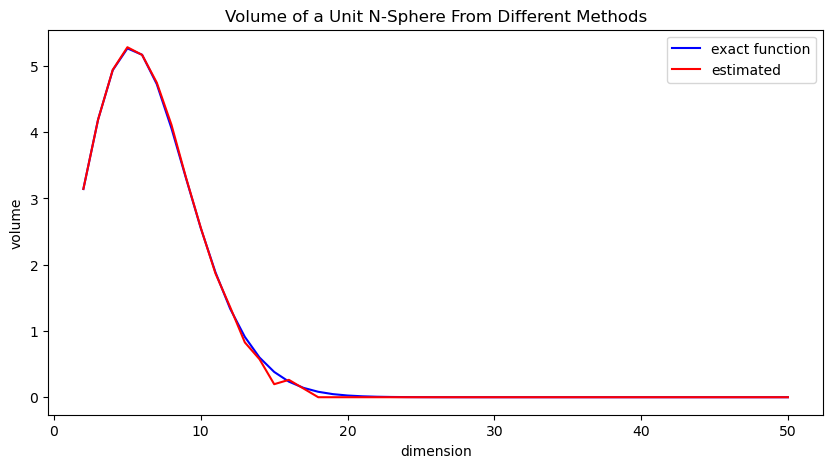

In [13]:
# TO DO

plt.figure(figsize = (10,5))
plt.plot(range(first_dim, last_dim+1), vol_sphere, color="blue", label="exact function")
plt.plot(range(first_dim, last_dim+1), est_vol, color="red", label="estimated")
# Add labels, title and legend
plt.xlabel("dimension")
plt.ylabel("volume")
plt.legend()
plt.title("Volume of a Unit N-Sphere From Different Methods")

plt.show()

#### (d) Interpret the actual volume and see if there is anything unexpected. Comment on your findings.

<div class="alert alert-block alert-success">

    The volume of an N-Sphere increases up to a certain dimension, and then goes down as the dimensions increase, approaching zero. This is very peculiar. A side observation is that the estimated volume becomes less reliable as the dimensions increase. Eventually the estimated volume becomes exactly zero due to no points being sampled from the small n-volume of the sphere. 

<div class="alert alert-block alert-danger">

# <p style="text-align: center;">The End</p>
